**Problem Statement**
=====================

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short-term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

**Background**
------------

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

**Objective**
----------

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

**Task**
-----

The company wants to know:

* **Which variables are significant in predicting the demand for shared bikes.**
* **How well those variables describe the bike demands**

**Dataset**
----------

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

**Business Goal**
----------------

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Data Cleaning and Manipulation

### Imports and Initial Setup

In [35]:
# Importing core libraries required for the case study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sea
import datetime as dt
from tabulate import tabulate
from IPython.display import display, HTML
import warnings
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

pd.set_option('display.max_rows', None)     # To display all rows
pd.set_option('display.max_columns', None)  # To display all columns
pd.set_option('display.max_colwidth', 25) 

# Suppress warnings
warnings.filterwarnings('ignore')

### Loading Data

In [36]:
df=pd.read_csv("day.csv")
df.head(5)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [37]:
# renaming few columns for better readibility

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [38]:
df.head()

instant      dteday  season  year  month  holiday  weekday  workingday  \
0        1  01-01-2018       1     0      1        0        6           0   
1        2  02-01-2018       1     0      1        0        0           0   
2        3  03-01-2018       1     0      1        0        1           1   
3        4  04-01-2018       1     0      1        0        2           1   
4        5  05-01-2018       1     0      1        0        3           1   

   weathersit       temp     atemp  humidity  windspeed  casual  registered  \
0           2  14.110847  18.18125   80.5833  10.749882     331         654   
1           2  14.902598  17.68695   69.6087  16.652113     131         670   
2           1   8.050924   9.47025   43.7273  16.636703     120        1229   
3           1   8.200000  10.60610   59.0435  10.739832     108        1454   
4           1   9.305237  11.46350   43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [39]:
df.describe()

instant      season        year       month     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp    humidity   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [40]:
df.shape

(730, 16)

**Checking Percentage of Missing Values**
1. **Ensures data quality and integrity**: Verifies that data is accurate and reliable.
2. **Identifies potential biases**: Reveals missing values that could skew analysis and modeling results.
3. **Determines need for data imputation or interpolation**: Indicates whether missing values need to be filled or estimated.
4. **Avoids reduced performance**: Prevents missing values can impact negatively .
5. **Reduces risk of overfitting or underfitting**: Ensures that models are trained on complete and representative data.
6. **Informs data preprocessing and feature engineering decisions**: Guides choices about handling missing values and data preparation.
7. **Helps meet data quality thresholds**: Ensures that missing values are within acceptable limits (e.g., <5%, 5-10%, >10%).

In [41]:
percentage_missing = (df.isnull().sum() / len(df)) * 100
percentage_missing_sorted = percentage_missing.sort_values(ascending=False)
percentage_missing_sorted

instant       0.0
dteday        0.0
season        0.0
year          0.0
month         0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [42]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

Empty DataFrame
Columns: [instant, dteday, season, year, month, holiday, weekday, workingday, weathersit, temp, atemp, humidity, windspeed, casual, registered, cnt]
Index: []

### Dropping Columns


The **instant** column, being a unique identifier, doesn't provide any meaningful information for the analysis.

The **dteday** column, as you mentioned, is redundant due to the presence of other time-related columns like **yr**, **mnth**, and **weekday**.

By removing these columns, the dataset will be more streamlined and focused on the relevant variables for analysis.


In [43]:
df.head()

instant      dteday  season  year  month  holiday  weekday  workingday  \
0        1  01-01-2018       1     0      1        0        6           0   
1        2  02-01-2018       1     0      1        0        0           0   
2        3  03-01-2018       1     0      1        0        1           1   
3        4  04-01-2018       1     0      1        0        2           1   
4        5  05-01-2018       1     0      1        0        3           1   

   weathersit       temp     atemp  humidity  windspeed  casual  registered  \
0           2  14.110847  18.18125   80.5833  10.749882     331         654   
1           2  14.902598  17.68695   69.6087  16.652113     131         670   
2           1   8.050924   9.47025   43.7273  16.636703     120        1229   
3           1   8.200000  10.60610   59.0435  10.739832     108        1454   
4           1   9.305237  11.46350   43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [44]:
df.drop(['instant', 'dteday'],  axis=1,inplace=True)

In [45]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

Empty DataFrame
Columns: [season, year, month, holiday, weekday, workingday, weathersit, temp, atemp, humidity, windspeed, casual, registered, cnt]
Index: []

In [46]:
df.head()

season  year  month  holiday  weekday  workingday  weathersit       temp  \
0       1     0      1        0        6           0           2  14.110847   
1       1     0      1        0        0           0           2  14.902598   
2       1     0      1        0        1           1           1   8.050924   
3       1     0      1        0        2           1           1   8.200000   
4       1     0      1        0        3           1           1   9.305237   

      atemp  humidity  windspeed  casual  registered   cnt  
0  18.18125   80.5833  10.749882     331         654   985  
1  17.68695   69.6087  16.652113     131         670   801  
2   9.47025   43.7273  16.636703     120        1229  1349  
3  10.60610   59.0435  10.739832     108        1454  1562  
4  11.46350   43.6957  12.522300      82        1518  1600

In [47]:
df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [48]:
df.dtypes

season          int64
year            int64
month           int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [49]:
df.holiday.unique()

array([0, 1])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Data Types and Interpretation**
================================

### Categorical and Numerical Values
#### Columns 0-6
* **season**
* **year**
* **month**
* **holiday**
* **weekday**
* **workingday**
* **weathersit**
are integers (int64), likely representing categorical or numerical values.

### Continuous Values
#### Columns 7-10
* **temp**
* **atemp**
* **humidity**
* **windspeed**
are floating-point numbers (float64), likely representing continuous values.

### Count and Numerical Values
#### Columns 11-13
* **casual**
* **registered**
* **cnt**
are integers (int64), likely representing count or numerical values.

In [50]:
df.holiday.unique()

array([0, 1])

## Outlier treatment

In [51]:
def get_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    return {'lower_bound': q1 - 1.5 * iqr, 'upper_bound': q3 + 1.5 * iqr}

def visualize_outliers(df, column):
    print('column',column)
    fig, p = plot.subplots(1, 2, figsize=(8, 4))
    sea.boxplot(df[column], ax=p[0], orient="h")
    p[0].set_title('Plot [' + column + '] - Original')
    new_df = df[(df[column] > get_iqr(df, column)['lower_bound']) & (df[column] < get_iqr(df, column)['upper_bound'])]
    sea.boxplot(new_df[column], ax=p[1], orient="h")
    p[1].set_title('Plot [' + column + '] - Post Outlier Treatment')
    plot.tight_layout()
    plot.show()

def remove_outliers(df, column):
    old_rows = len(df)
    iqr_bounds = get_iqr(df, column)
    new_df = df[(df[column] > iqr_bounds['lower_bound']) & (df[column] < iqr_bounds['upper_bound'])]
    new_rows = len(new_df)
    print('Rows dropped: ', old_rows - new_rows)
    print('Percentage rows dropped: ', round((old_rows - new_rows) / old_rows * 100, 2), "%")
    return new_df

original_row_count 730
['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'cnt']
column temp


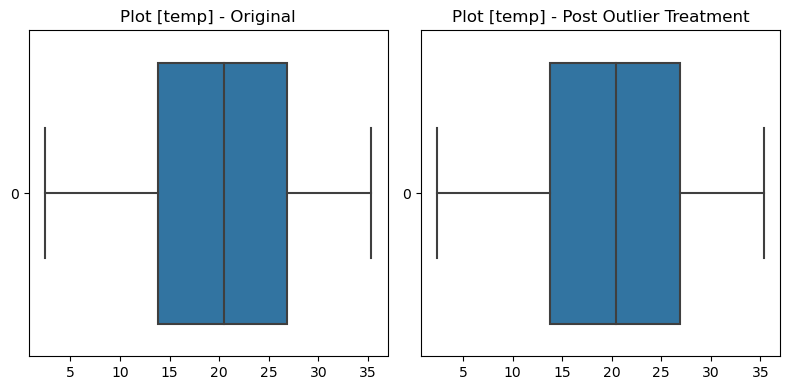

Rows dropped:  0
Percentage rows dropped:  0.0 %
column atemp


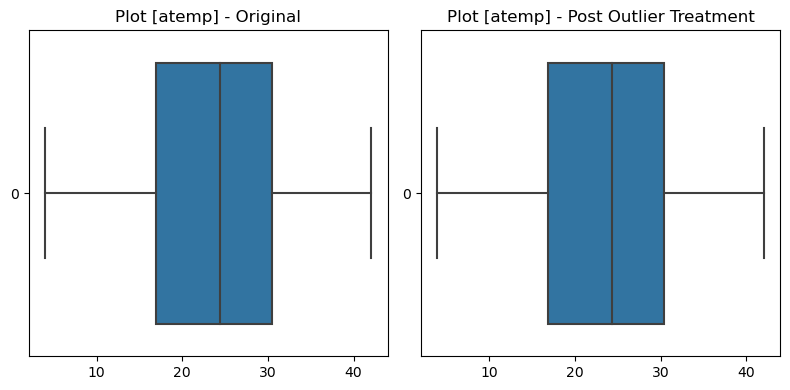

Rows dropped:  0
Percentage rows dropped:  0.0 %
column humidity


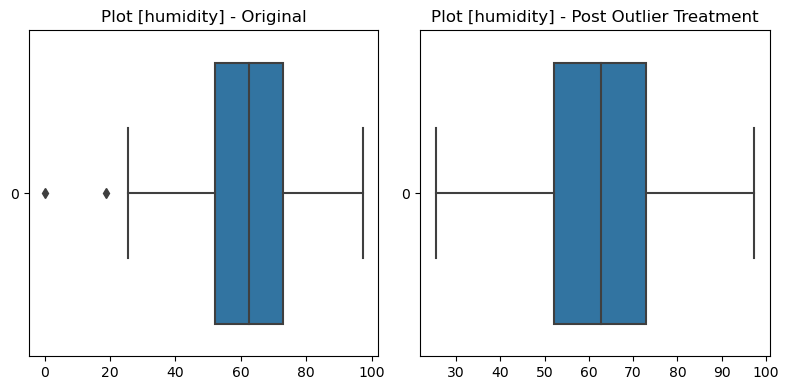

Rows dropped:  2
Percentage rows dropped:  0.27 %
column windspeed


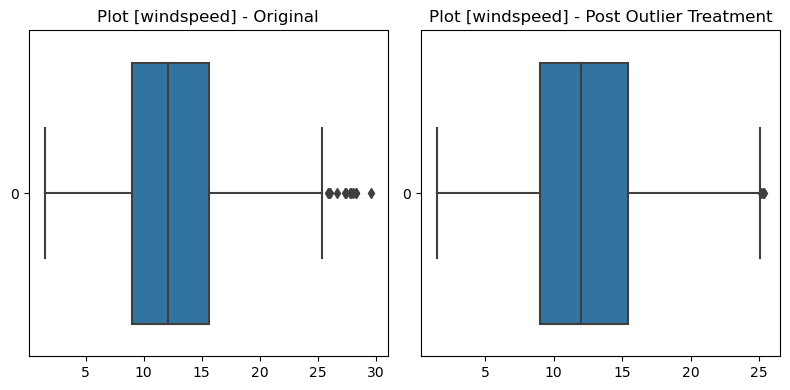

Rows dropped:  12
Percentage rows dropped:  1.65 %
column casual


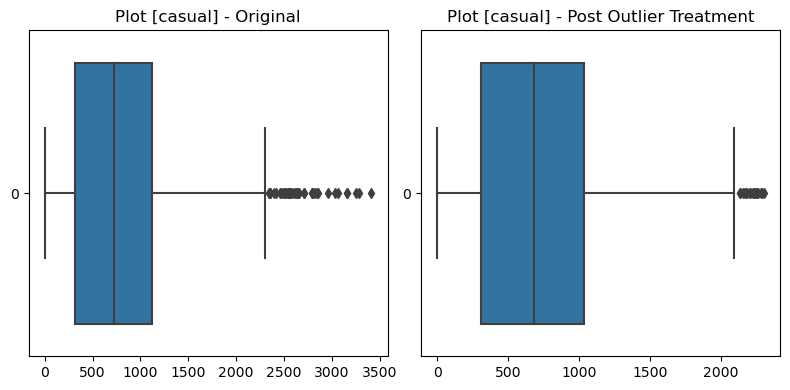

Rows dropped:  41
Percentage rows dropped:  5.73 %
column registered


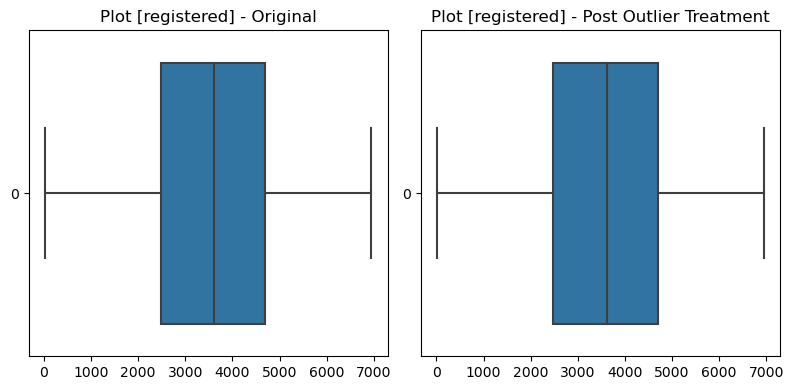

Rows dropped:  0
Percentage rows dropped:  0.0 %
column cnt


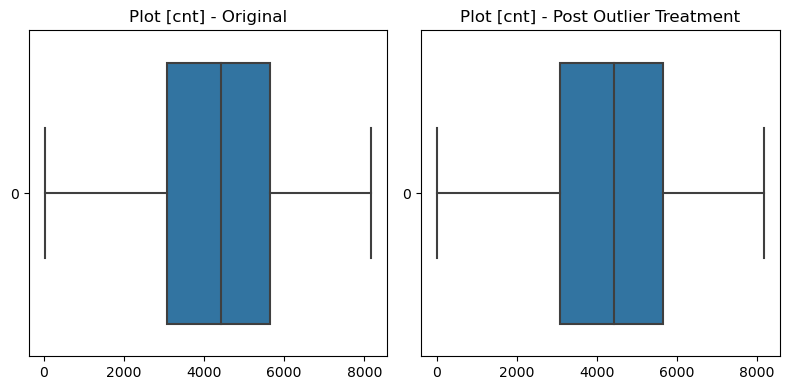

Rows dropped:  0
Percentage rows dropped:  0.0 %


675

In [52]:
original_row_count = len(df)
print('original_row_count',original_row_count)

outlier_treatment = ['temp','atemp','humidity','windspeed','casual','registered','cnt']
print(outlier_treatment)
for column in outlier_treatment:
    visualize_outliers(df, column)
    df = remove_outliers(df, column)
len(df)

### Features Engineering

In [53]:
df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [54]:
unique_values = df.season.unique()
unique_values

array([1, 2, 3, 4])

# Encoding/mapping the season column

In [55]:
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [56]:
unique_values = df.month.unique()
unique_values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

# Encoding/mapping the month column

In [57]:
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

# Encoding/mapping the weekday column

In [58]:
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [59]:
df['weathersit'].unique()

array([2, 1, 3])

In [60]:
df.weathersit = df.weathersit.map({1:'sunny',2:'cloudy',3:'rainy'})

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 91.4+ KB


In [61]:
df.head()

season  year month  holiday weekday  workingday weathersit       temp  \
0  spring     0   jan        0     sat           0     cloudy  14.110847   
1  spring     0   jan        0     sun           0     cloudy  14.902598   
2  spring     0   jan        0     mon           1      sunny   8.050924   
3  spring     0   jan        0     tue           1      sunny   8.200000   
4  spring     0   jan        0     wed           1      sunny   9.305237   

      atemp  humidity  windspeed  casual  registered   cnt  
0  18.18125   80.5833  10.749882     331         654   985  
1  17.68695   69.6087  16.652113     131         670   801  
2   9.47025   43.7273  16.636703     120        1229  1349  
3  10.60610   59.0435  10.739832     108        1454  1562  
4  11.46350   43.6957  12.522300      82        1518  1600

## Univeriate Analysis

In [68]:
column_titles={
"season": "Season of the year",
"year": "Year of observation",
"holiday": "Holiday",
"month": "Month of observation",
"weekday": "Weekday indicator",
"workingday": "Working day indicator",
"weathersit": "Weather situation",
"temp": "Temperature",
"atemp": "Apparent temperature",
"humidity": "Relative humidity",
"windspeed": "Wind speed",
"casual": "Casual bike users",
"registered": "Registered bike users",
"cnt": "Total bike users"
}

In [69]:
def univariate_analysis(df, columns):
    num_columns = len(columns)
    fig, p = plot.subplots(num_columns, 2, figsize=(16, 4*num_columns))
    for i, column in enumerate(columns):
        sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[i, 0])
        sea.boxplot(x=column, data=df, ax=p[i, 1])
        p[i, 0].set_xlabel(column_titles[column])
        p[i, 1].set_xlabel(column_titles[column])
        p[i, 0].set_yticks([])
        p[i, 1].set_yticks([])
        p[i, 1].set_xticklabels(p[i, 1].get_xticklabels())
        mode_value = df[column].mode().values[0]
        p[i, 1].axvline(x=mode_value, color='red', linestyle='--', label='Mode')
        min_value = df[column].min()
        max_value = df[column].max()
        # Find the range where most of the values are present
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        p[i, 0].annotate(f'Most values between {q1} and {q3}', xy=(0, 1.1), xycoords='axes fraction', ha='left', va='bottom')
        p[i, 0].annotate(f'Range: {min_value} - {max_value}', xy=(0, 1.0), xycoords='axes fraction', ha='left', va='bottom')
        p[i, 0].annotate(f' ', xy=(0, 0.9), xycoords='axes fraction', ha='left', va='bottom')  # Add a newline
        p[i, 0].annotate(f'{i+1}.Univariate analysis of {column_titles[column]}', xy=(0.5, 1.2), xycoords='axes fraction', ha='center', va='bottom', fontsize=12, fontweight='bold')
        new_row = pd.DataFrame({'Feature': [column_titles[column]], 'Most values between': [f'{q1} - {q3}'], 'Range': [f'{min_value} - {max_value}']})
        
    plot.tight_layout()
    plot.show()
    

## Quantitative Variable Analysis

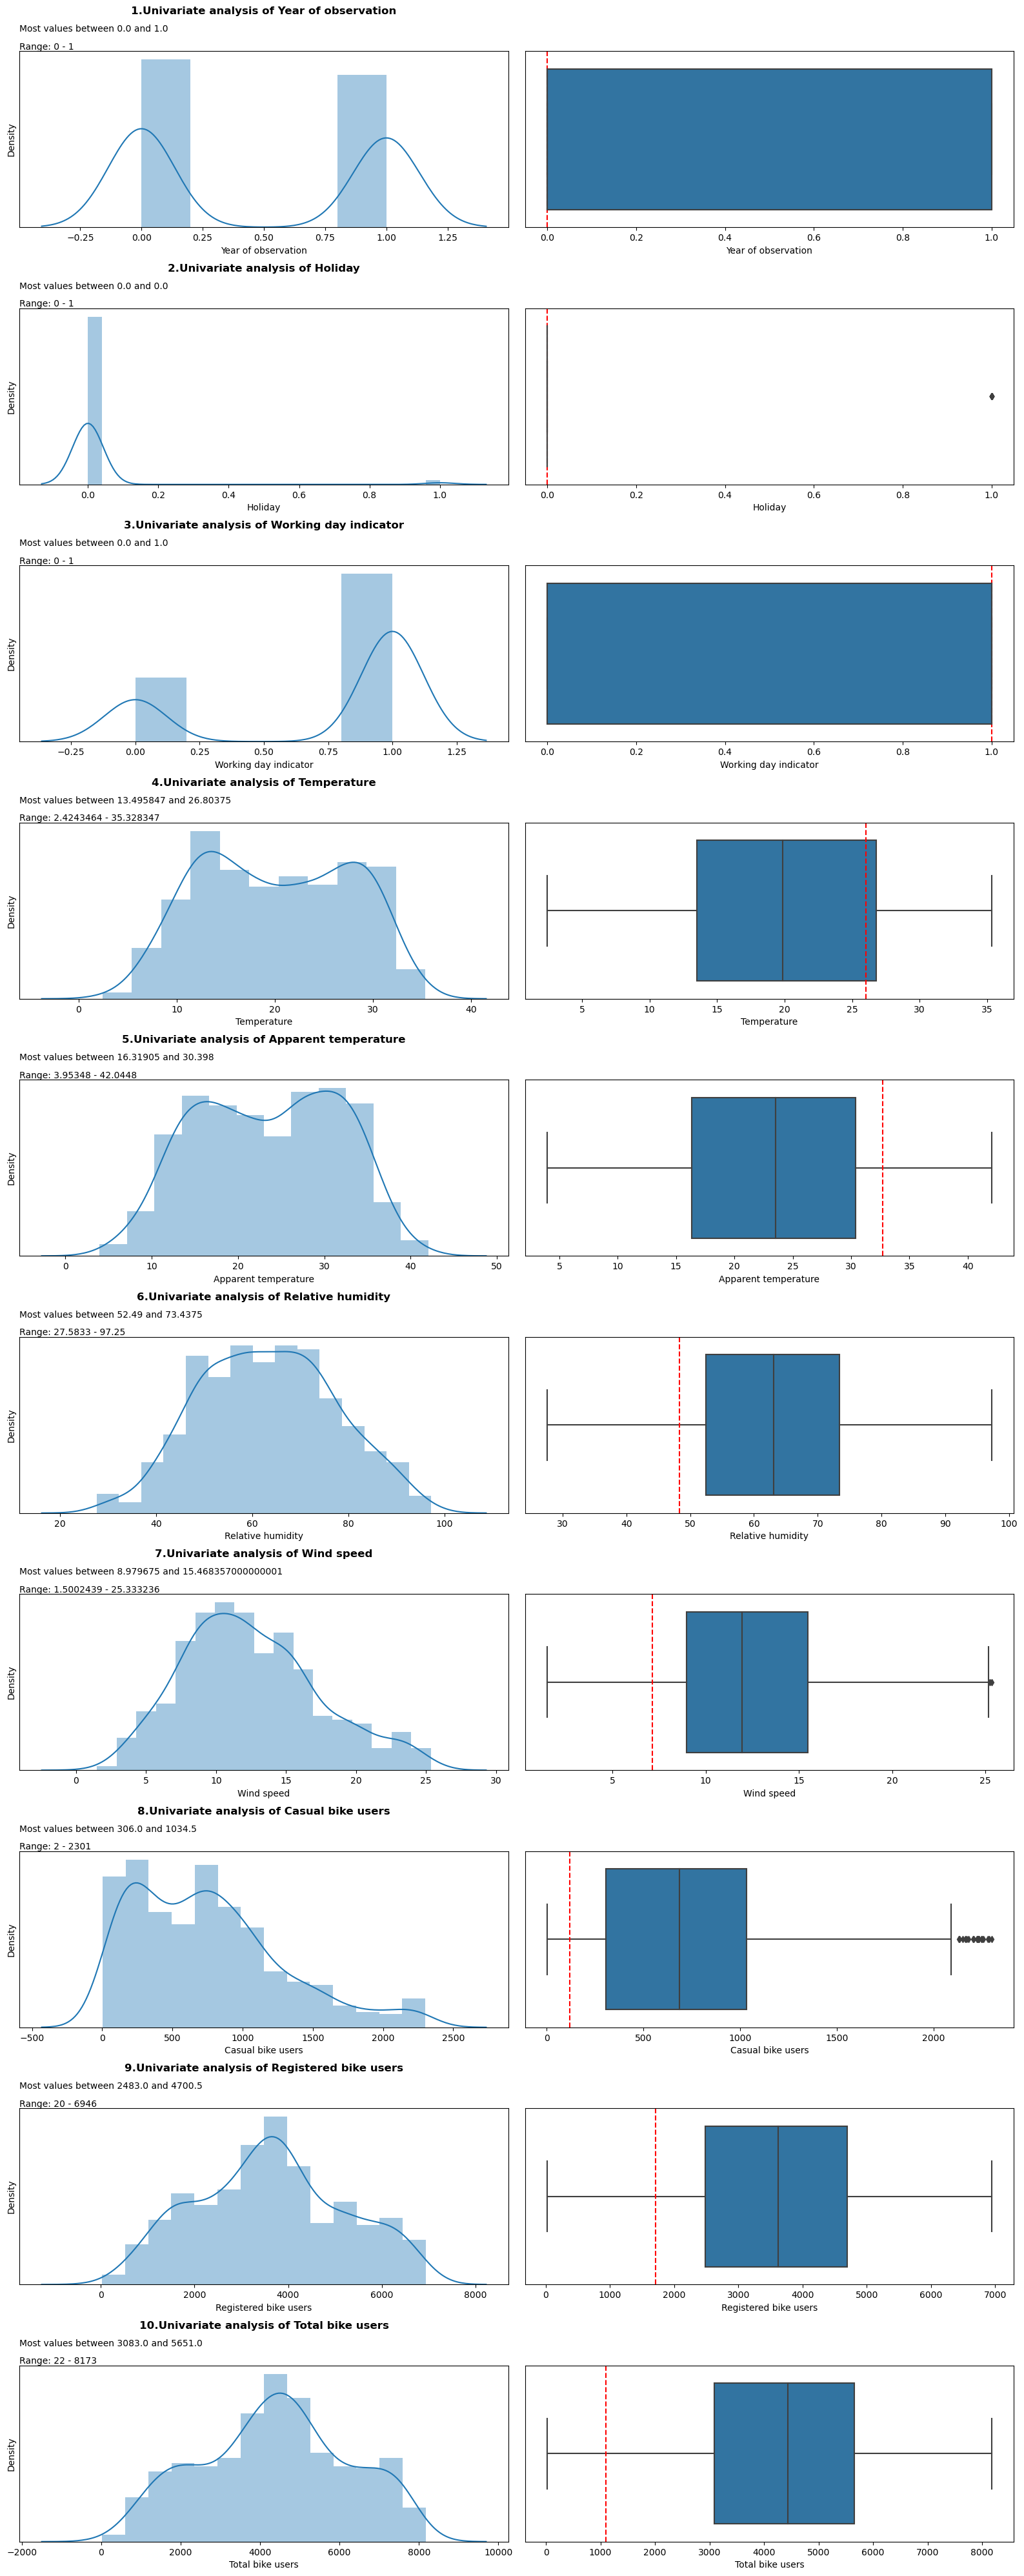

In [70]:
numerical_columns = df.select_dtypes(include=[int, float]).columns
univariate_analysis(df,numerical_columns)

## Categorical Variable Analysis


In [71]:
object_columns = df.select_dtypes(include=[object]).columns

In [72]:
object_columns

Index(['season', 'month', 'weekday', 'weathersit'], dtype='object')

In [73]:

def plot_column_distribution(df, columns_info):
    """
    Plot the distribution of multiple columns in a dataframe.

 Parameters:
    df (pandas.DataFrame): The input dataframe.
    columns_info (list): A list of objects containing column information.
        Each object should have the following properties:
            - column (str): The column name.
            - title (str): The title of the plot.
            - xlabel (str): The label for the x-axis.
            - ylabel (str): The label for the y-axis.
    """
    for column_info in columns_info:
        column = column_info['column']
        title = column_info['title']
        xlabel = column_info['xlabel']
        ylabel = column_info['ylabel']
        df[column].value_counts().plot.bar(title=title, xlabel=xlabel, ylabel=ylabel, rot=45)
        plot.show()

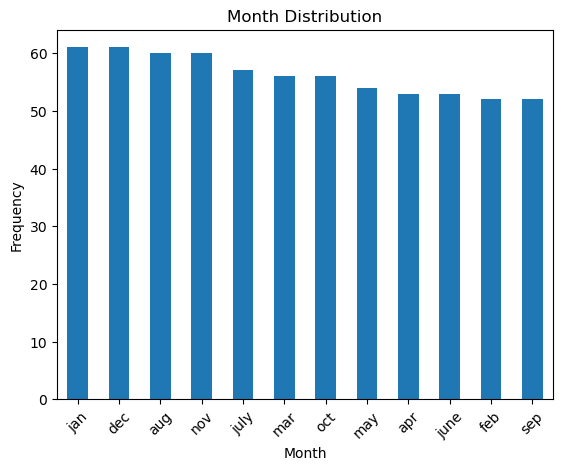

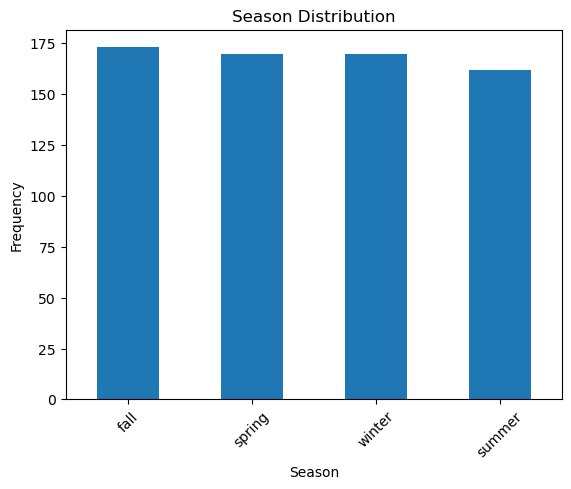

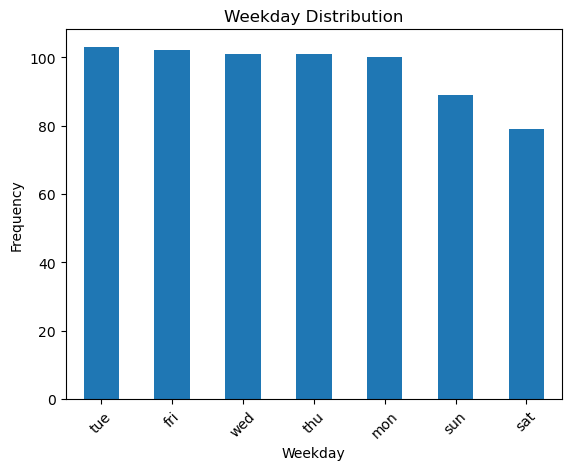

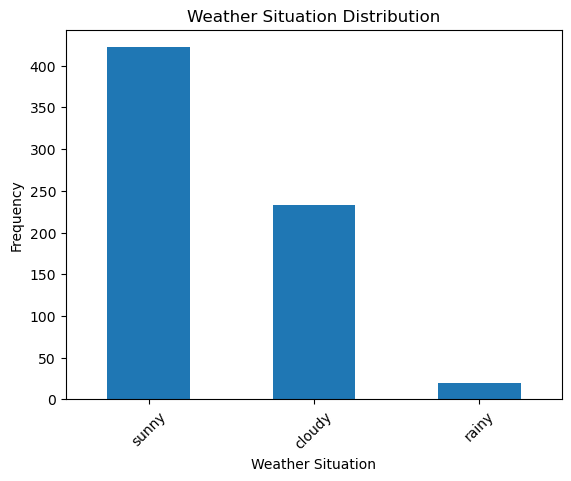

In [74]:
ordered_columns_info = [
     {'column': 'month', 'title': 'Month Distribution', 'xlabel': 'Month', 'ylabel': 'Frequency'},
    {'column': 'season', 'title': 'Season Distribution', 'xlabel': 'Season', 'ylabel': 'Frequency'},
    {'column': 'weekday', 'title': 'Weekday Distribution', 'xlabel': 'Weekday', 'ylabel': 'Frequency'}
]
unordered_columns_info = [
{'column': 'weathersit', 'title': 'Weather Situation Distribution', 'xlabel': 'Weather Situation', 'ylabel': 'Frequency'}
]

plot_column_distribution(df, ordered_columns_info)
plot_column_distribution(df, unordered_columns_info)

## Bivariate Analysis

In [75]:
def series_plot(df, column, hue=None, annot=1, annot_format='{:.1f}%'):
    # Calculate plot width based on category count
    plot_width = len(df[column].unique()) * 1.5
    
    # Create figure and axis
    fig, ax = plot.subplots(figsize=(plot_width, 7))
    
    # Create count plot with optional hue mapping
    ax = sea.countplot(data=df, x=column, order=df[column].value_counts().index, hue=hue)
    # Add title and labels
    ax.set_title('Count Plot of {}'.format(column))
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    
    # Show plot
    plot.show()

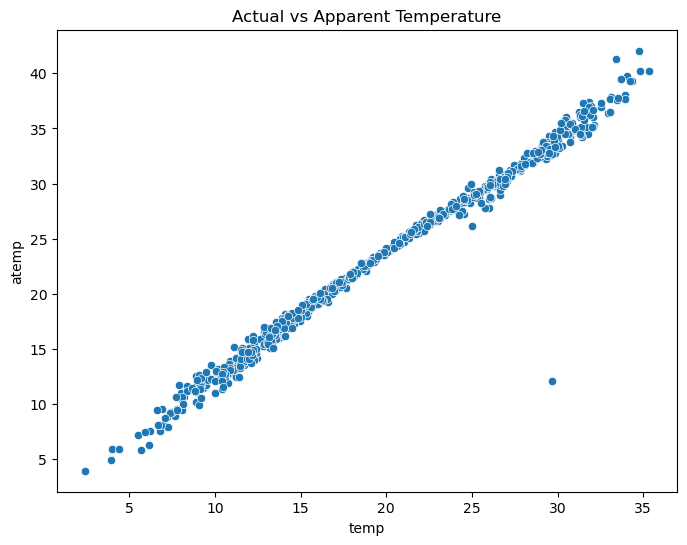

In [76]:
plot.figure(figsize=(8,6))
sea.scatterplot(x="temp", y="atemp", data=df)
plot.title("Actual vs Apparent Temperature")
plot.show()


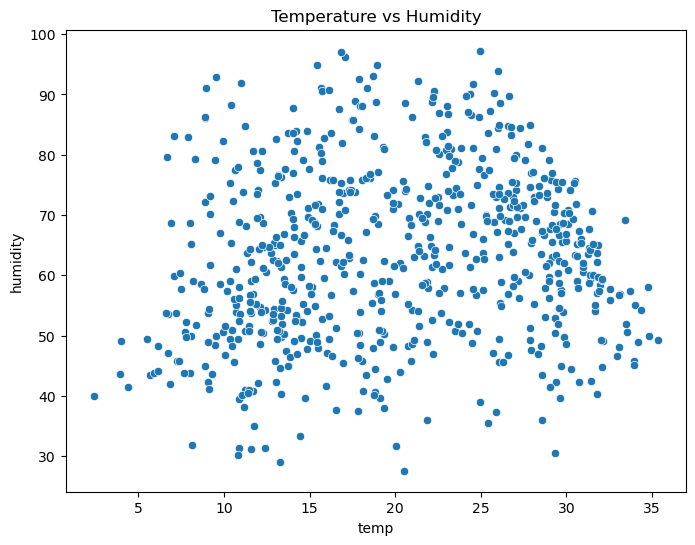

In [77]:
plot.figure(figsize=(8,6))
sea.scatterplot(x="temp", y="humidity", data=df)
plot.title("Temperature vs Humidity")
plot.show()

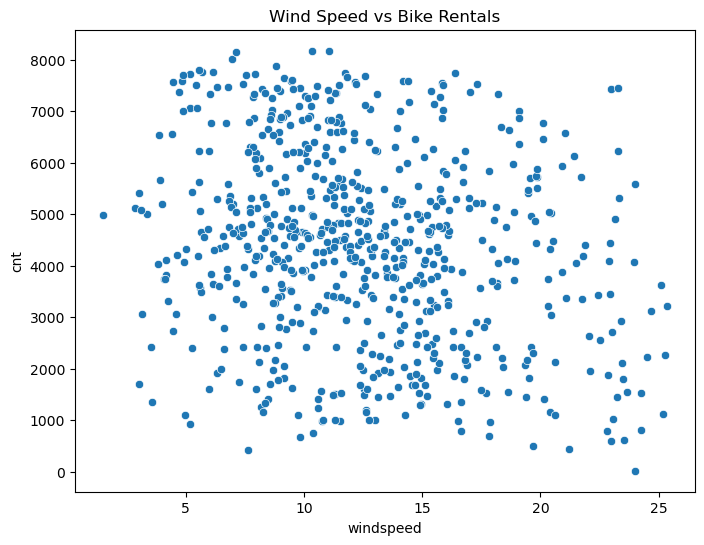

In [78]:
plot.figure(figsize=(8,6))
sea.scatterplot(x="windspeed", y="cnt", data=df)
plot.title("Wind Speed vs Bike Rentals")
plot.show()

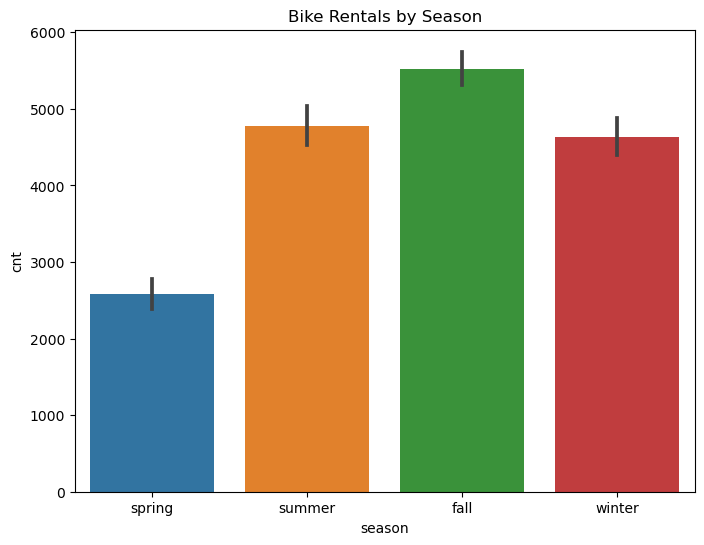

In [79]:
plot.figure(figsize=(8,6))
sea.barplot(x="season", y="cnt", data=df)
plot.title("Bike Rentals by Season")
plot.show()

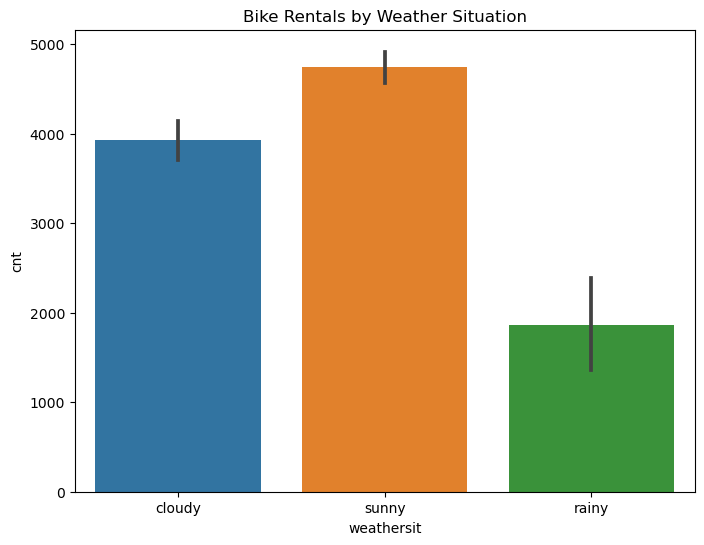

In [80]:
plot.figure(figsize=(8,6))
sea.barplot(x="weathersit", y="cnt", data=df)
plot.title("Bike Rentals by Weather Situation")
plot.show()

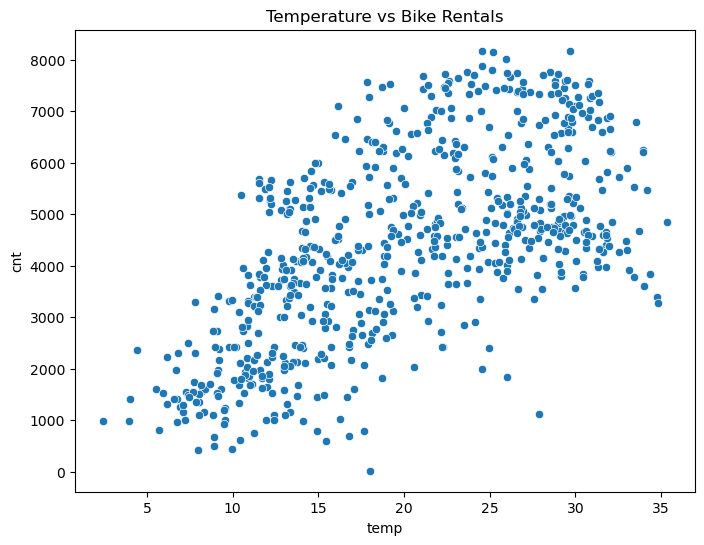

In [81]:
plot.figure(figsize=(8,6))
sea.scatterplot(x="temp", y="cnt", data=df)
plot.title("Temperature vs Bike Rentals")
plot.show()

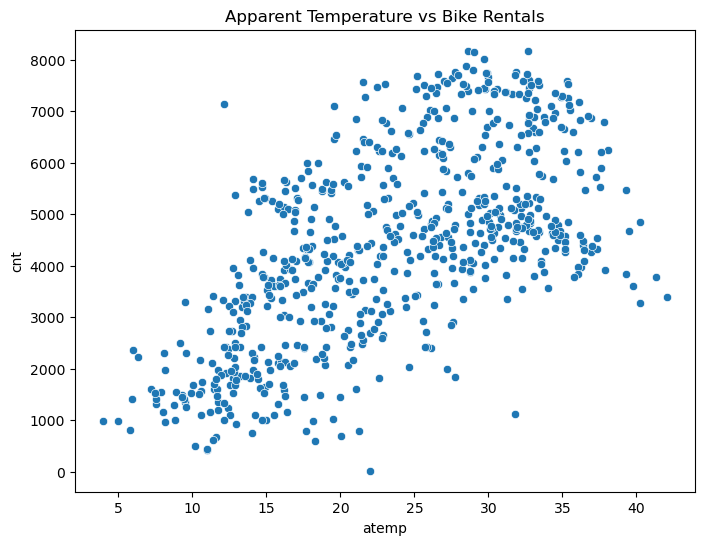

In [82]:

# Scatter plot: atemp vs. cnt
plot.figure(figsize=(8,6))
sea.scatterplot(x="atemp", y="cnt", data=df)
plot.title("Apparent Temperature vs Bike Rentals")
plot.show()

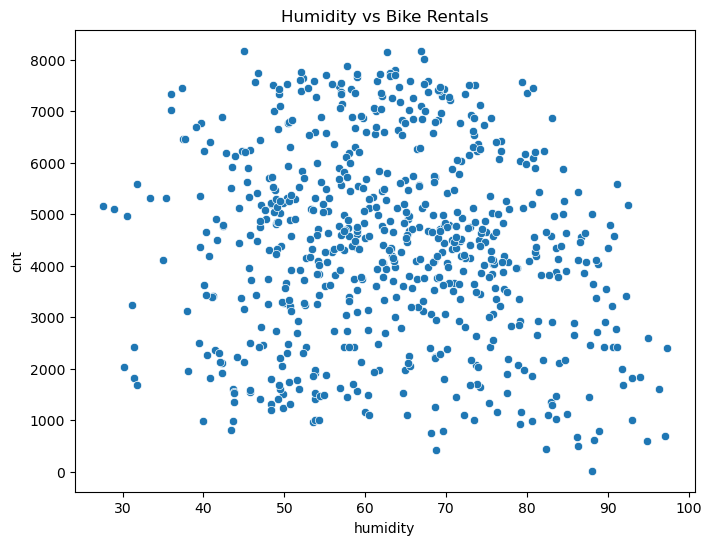

In [83]:

# Scatter plot: humidity vs. cnt
plot.figure(figsize=(8,6))
sea.scatterplot(x="humidity", y="cnt", data=df)
plot.title("Humidity vs Bike Rentals")
plot.show()

### Multivariant Analysis

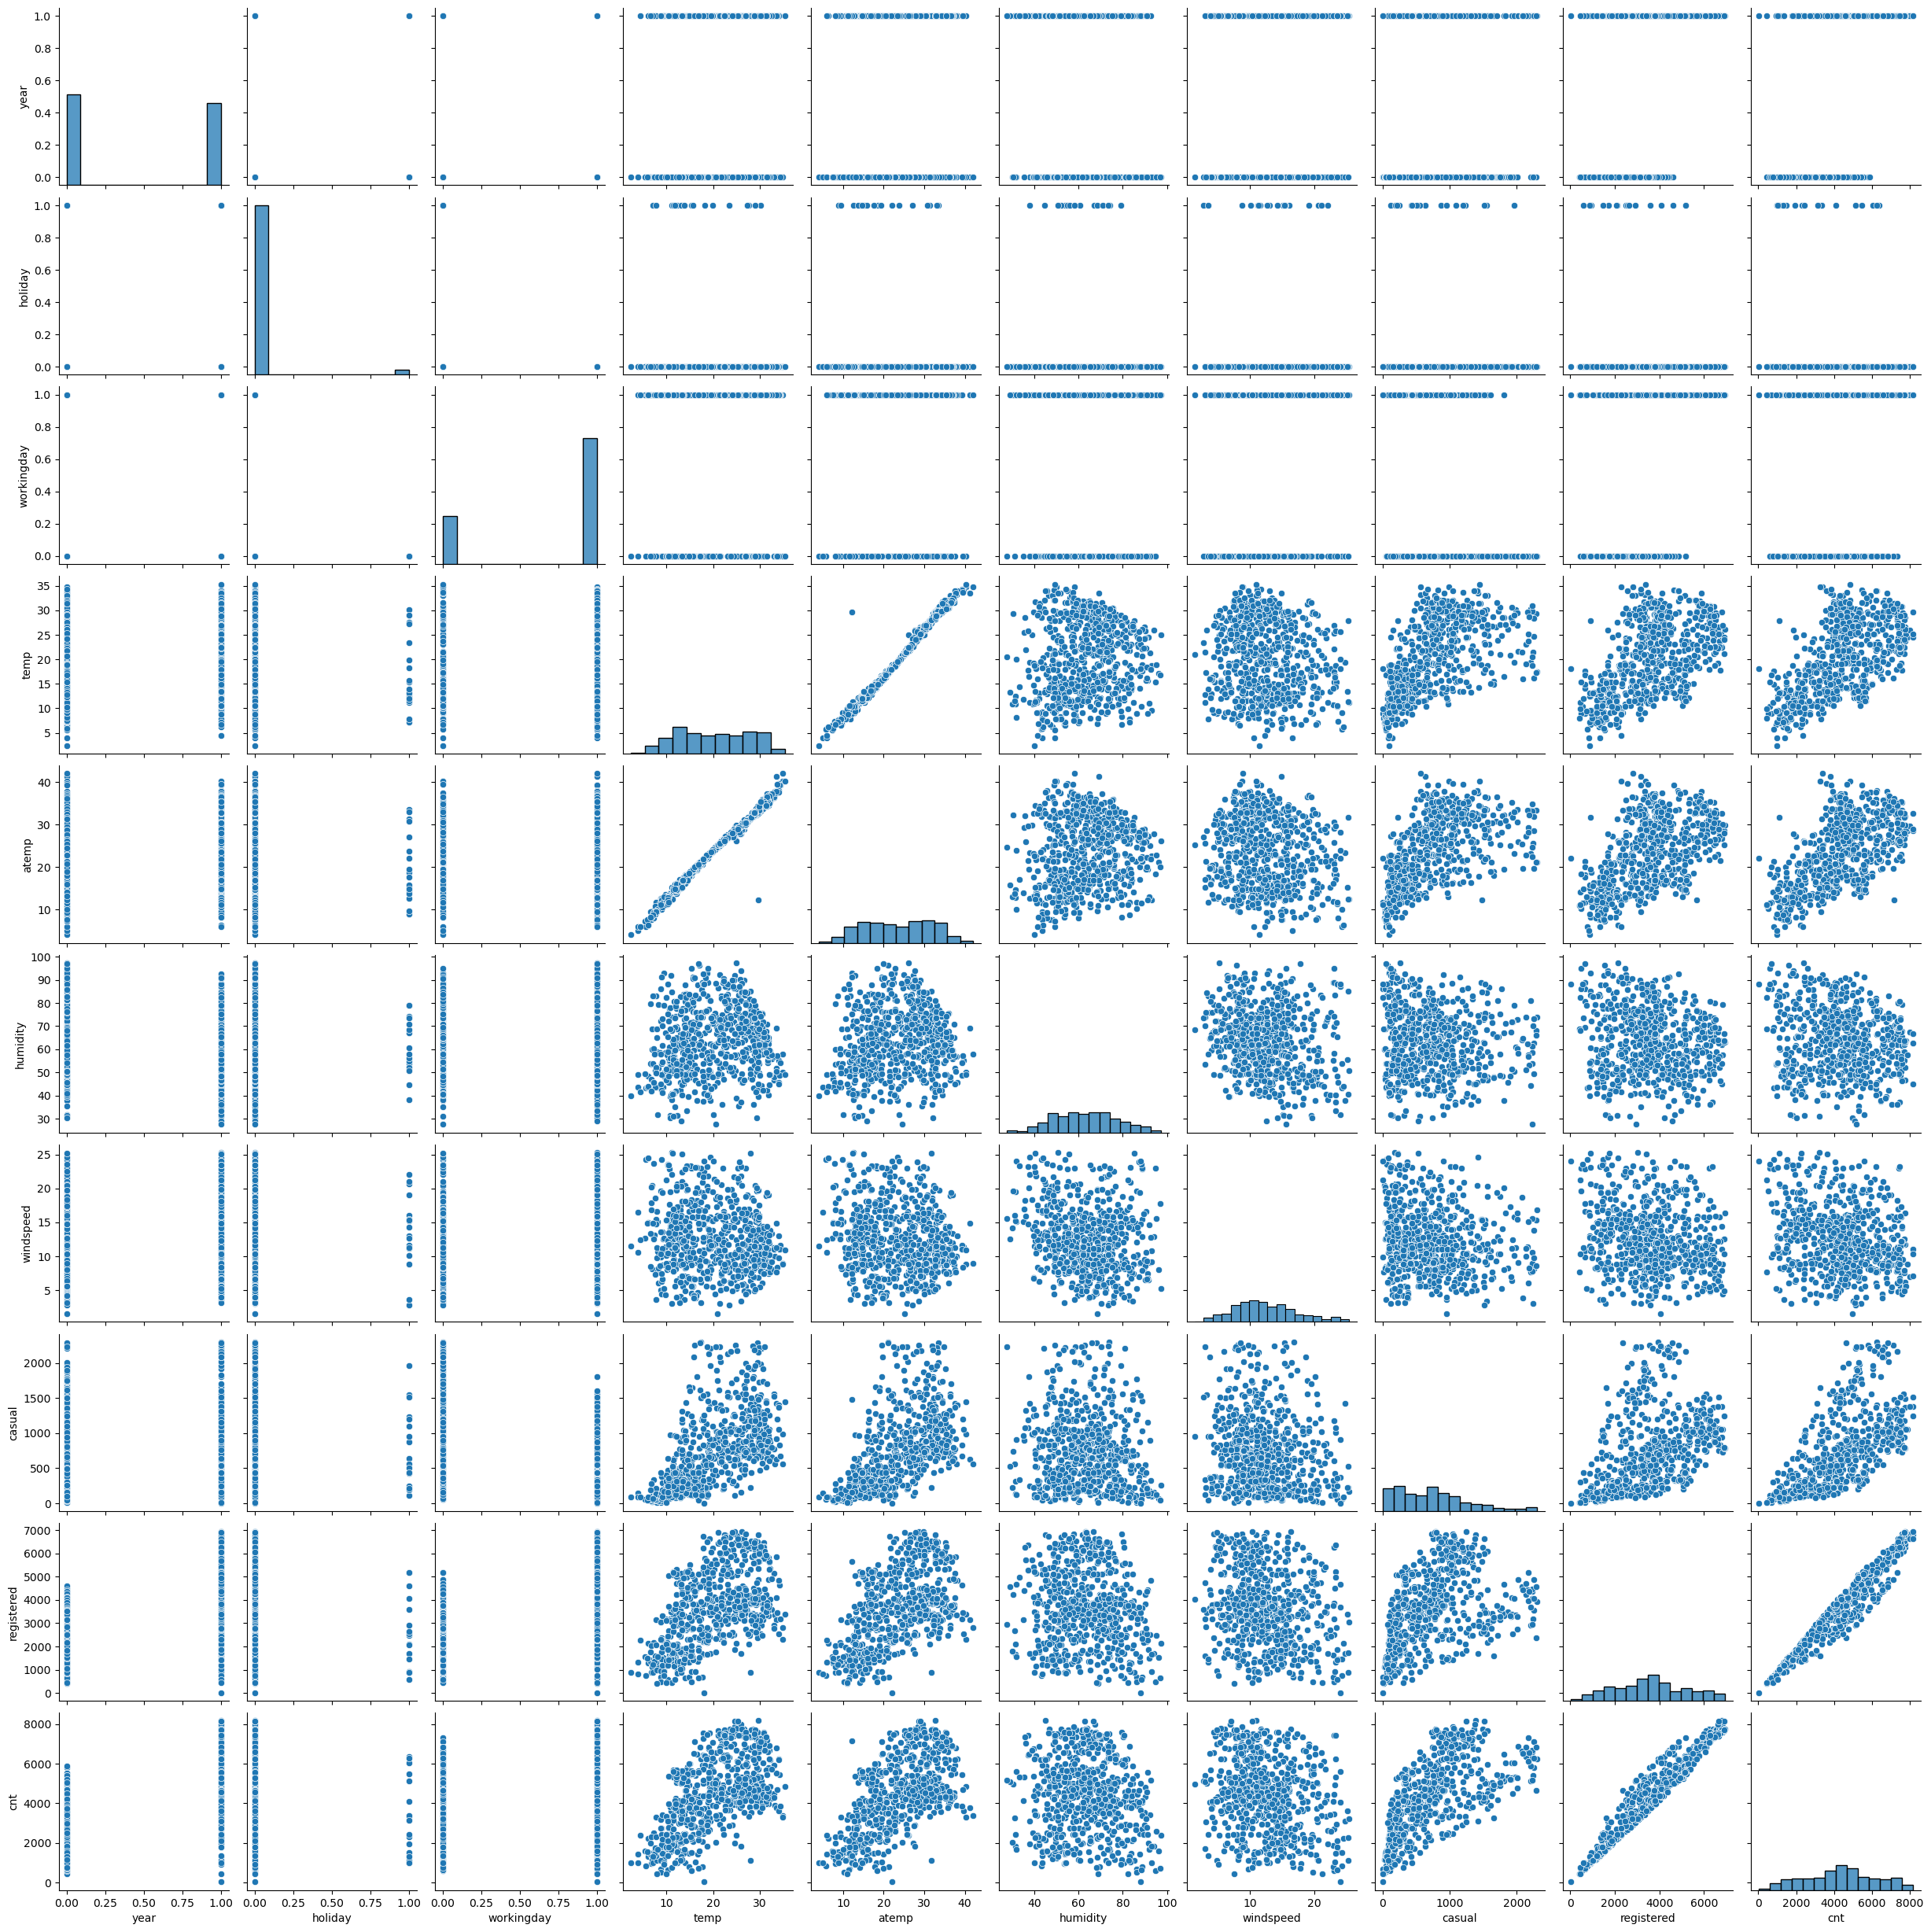

In [84]:
sea.pairplot(data=df,vars=numerical_columns)
plot.show()

In [85]:
def analyze_correlations(df, numeric_cols, thresh_config):
    # Calculate correlation matrix
    corr_matrix = df[numeric_cols].corr()

    # Initialize empty dictionaries to store variable pairs
    correlations = {category: [] for category in thresh_config}

    # Iterate over the upper triangle of the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            # Get the correlation coefficient
            corr_coef = corr_matrix.iloc[i, j]

            # Categorize correlations based on thresholds
            for category, thresh in thresh_config.items():
                if category == "Strong Positive" and corr_coef > thresh:
                    correlations[category].append((corr_matrix.columns[i], corr_matrix.columns[j], corr_coef))
                elif category == "Positive" and corr_coef > thresh_config["Strong Positive"] and corr_coef <= thresh:
                    correlations[category].append((corr_matrix.columns[i], corr_matrix.columns[j], corr_coef))
                elif category == "Weak Positive" and corr_coef > 0 and corr_coef <= thresh:
                    correlations[category].append((corr_matrix.columns[i], corr_matrix.columns[j], corr_coef))
                elif category == "Weak Correlation" and corr_coef > thresh_config["Weak Positive"] and corr_coef <= thresh:
                    correlations[category].append((corr_matrix.columns[i], corr_matrix.columns[j], corr_coef))
                elif category == "Weak Negative" and corr_coef < 0 and corr_coef >= thresh:
                    correlations[category].append((corr_matrix.columns[i], corr_matrix.columns[j], corr_coef))
                elif category == "Negative" and corr_coef < thresh_config["Weak Negative"] and corr_coef >= thresh:
                    correlations[category].append((corr_matrix.columns[i], corr_matrix.columns[j], corr_coef))
                elif category == "Strong Negative" and corr_coef < thresh:
                    correlations[category].append((corr_matrix.columns[i], corr_matrix.columns[j], corr_coef))

    return correlations



thresh_config = {
    "Strong Positive": 0.7,
    "Positive": 0.5,
    "Weak Positive": 0.4,
    "Weak Correlation": 0.1,
    "Weak Negative": -0.3,
    "Negative": -0.5,
    "Strong Negative": -0.7
}

correlations = analyze_correlations(df, numerical_columns, thresh_config)

# Print results
table_data = []

for category, var_pairs in correlations.items():
    for var1, var2, corr_coef in var_pairs:
        table_data.append({
            "Category": category,
            "Feature A": var1,
            "Feature B": var2,
            "Correlation Coefficient": corr_coef
        })

df_corr = pd.DataFrame(table_data)

df_corr

Category   Feature A   Feature B  Correlation Coefficient
0   Strong Positive        temp       atemp                 0.991491
1   Strong Positive  registered         cnt                 0.965745
2     Weak Positive        year     holiday                 0.008102
3     Weak Positive        year  workingday                 0.076045
4     Weak Positive        year        temp                 0.027996
5     Weak Positive        year       atemp                 0.026681
6     Weak Positive        year      casual                 0.178888
7     Weak Positive     holiday   windspeed                 0.036263
8     Weak Positive     holiday      casual                 0.012669
9     Weak Positive  workingday        temp                 0.117779
10    Weak Positive  workingday       atemp                 0.116255
11    Weak Positive  workingday    humidity                 0.004257
12    Weak Positive  workingday  registered                 0.376048
13    Weak Positive  workingday         cnt                 0.197267
14    Weak Positive        temp    humidity                 0.124027
15    Weak Positive       atemp    humidity                 0.136894
16    Weak Negative        year    humidity                -0.108549
17    Weak Negative        year   windspeed                -0.024526
18    Weak Negative     holiday  workingday                -0.268381
19    Weak Negative     holiday        temp                -0.063625
20    Weak Negative     holiday       atemp                -0.067798
21    Weak Negative     holiday    humidity                -0.022033
22    Weak Negative     holiday  registered                -0.120270
23    Weak Negative     holiday         cnt                -0.098185
24    Weak Negative  workingday   windspeed                -0.018253
25    Weak Negative        temp   windspeed                -0.138370
26    Weak Negative       atemp   windspeed                -0.165827
27    Weak Negative    humidity   windspeed                -0.205312
28    Weak Negative    humidity      casual                -0.086765
29    Weak Negative    humidity  registered                -0.111066
30    Weak Negative    humidity         cnt                -0.118792
31    Weak Negative   windspeed      casual                -0.177899
32    Weak Negative   windspeed  registered                -0.213493
33    Weak Negative   windspeed         cnt                -0.231520
34         Negative  workingday      casual                -0.423818

In [93]:
df.head()

season  year month  holiday weekday  workingday weathersit       temp  \
0  spring     0   jan        0     sat           0     cloudy  14.110847   
1  spring     0   jan        0     sun           0     cloudy  14.902598   
2  spring     0   jan        0     mon           1      sunny   8.050924   
3  spring     0   jan        0     tue           1      sunny   8.200000   
4  spring     0   jan        0     wed           1      sunny   9.305237   

      atemp  humidity  windspeed  casual  registered   cnt  
0  18.18125   80.5833  10.749882     331         654   985  
1  17.68695   69.6087  16.652113     131         670   801  
2   9.47025   43.7273  16.636703     120        1229  1349  
3  10.60610   59.0435  10.739832     108        1454  1562  
4  11.46350   43.6957  12.522300      82        1518  1600

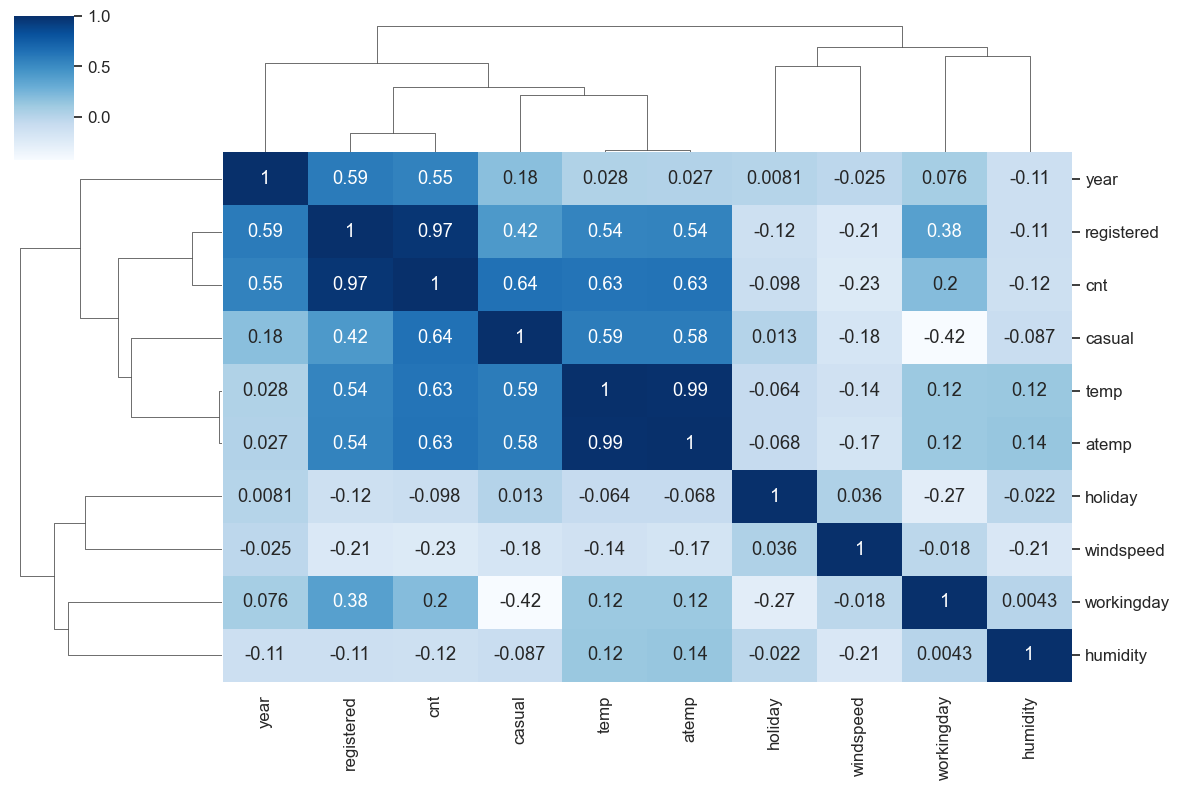

In [94]:

numerical_columns = df.select_dtypes(include=[int, float]).columns
corr = df[numerical_columns].corr()
sea.set(font_scale=1.1)
sea.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plot.show()

In [95]:
# Dummy variable creation for month, weekday, weathersit and season variables.
seasons_df=pd.get_dummies(df.season,drop_first=True,dtype=int)
months_df=pd.get_dummies(df.month,drop_first=True,dtype=int)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True,dtype=int)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True,dtype=int)

In [96]:
type(seasons_df)


pandas.core.frame.DataFrame

In [97]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([df,seasons_df,months_df,weekdays_df,weathersit_df],axis=1)

In [98]:
df_new.head()

season  year month  holiday weekday  workingday weathersit       temp  \
0  spring     0   jan        0     sat           0     cloudy  14.110847   
1  spring     0   jan        0     sun           0     cloudy  14.902598   
2  spring     0   jan        0     mon           1      sunny   8.050924   
3  spring     0   jan        0     tue           1      sunny   8.200000   
4  spring     0   jan        0     wed           1      sunny   9.305237   

      atemp  humidity  windspeed  casual  registered   cnt  spring  summer  \
0  18.18125   80.5833  10.749882     331         654   985       1       0   
1  17.68695   69.6087  16.652113     131         670   801       1       0   
2   9.47025   43.7273  16.636703     120        1229  1349       1       0   
3  10.60610   59.0435  10.739832     108        1454  1562       1       0   
4  11.46350   43.6957  12.522300      82        1518  1600       1       0   

   winter  aug  dec  feb  jan  july  june  mar  may  nov  oct  sep  mon  sat  \
0       0    0    0    0    1     0     0    0    0    0    0    0    0    1   
1       0    0    0    0    1     0     0    0    0    0    0    0    0    0   
2       0    0    0    0    1     0     0    0    0    0    0    0    1    0   
3       0    0    0    0    1     0     0    0    0    0    0    0    0    0   
4       0    0    0    0    1     0     0    0    0    0    0    0    0    0   

   sun  thu  tue  wed  rainy  sunny  
0    0    0    0    0      0      0  
1    1    0    0    0      0      0  
2    0    0    0    0      0      1  
3    0    0    1    0      0      1  
4    0    0    0    1      0      1

In [99]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)


In [100]:
# check the head of new dataframe

df_new.head()

year  holiday  workingday       temp     atemp  humidity  windspeed  \
0     0        0           0  14.110847  18.18125   80.5833  10.749882   
1     0        0           0  14.902598  17.68695   69.6087  16.652113   
2     0        0           1   8.050924   9.47025   43.7273  16.636703   
3     0        0           1   8.200000  10.60610   59.0435  10.739832   
4     0        0           1   9.305237  11.46350   43.6957  12.522300   

   casual  registered   cnt  spring  summer  winter  aug  dec  feb  jan  july  \
0     331         654   985       1       0       0    0    0    0    1     0   
1     131         670   801       1       0       0    0    0    0    1     0   
2     120        1229  1349       1       0       0    0    0    0    1     0   
3     108        1454  1562       1       0       0    0    0    0    1     0   
4      82        1518  1600       1       0       0    0    0    0    1     0   

   june  mar  may  nov  oct  sep  mon  sat  sun  thu  tue  wed  rainy  sunny  
0     0    0    0    0    0    0    0    1    0    0    0    0      0      0  
1     0    0    0    0    0    0    0    0    1    0    0    0      0      0  
2     0    0    0    0    0    0    1    0    0    0    0    0      0      1  
3     0    0    0    0    0    0    0    0    0    0    1    0      0      1  
4     0    0    0    0    0    0    0    0    0    0    0    1      0      1

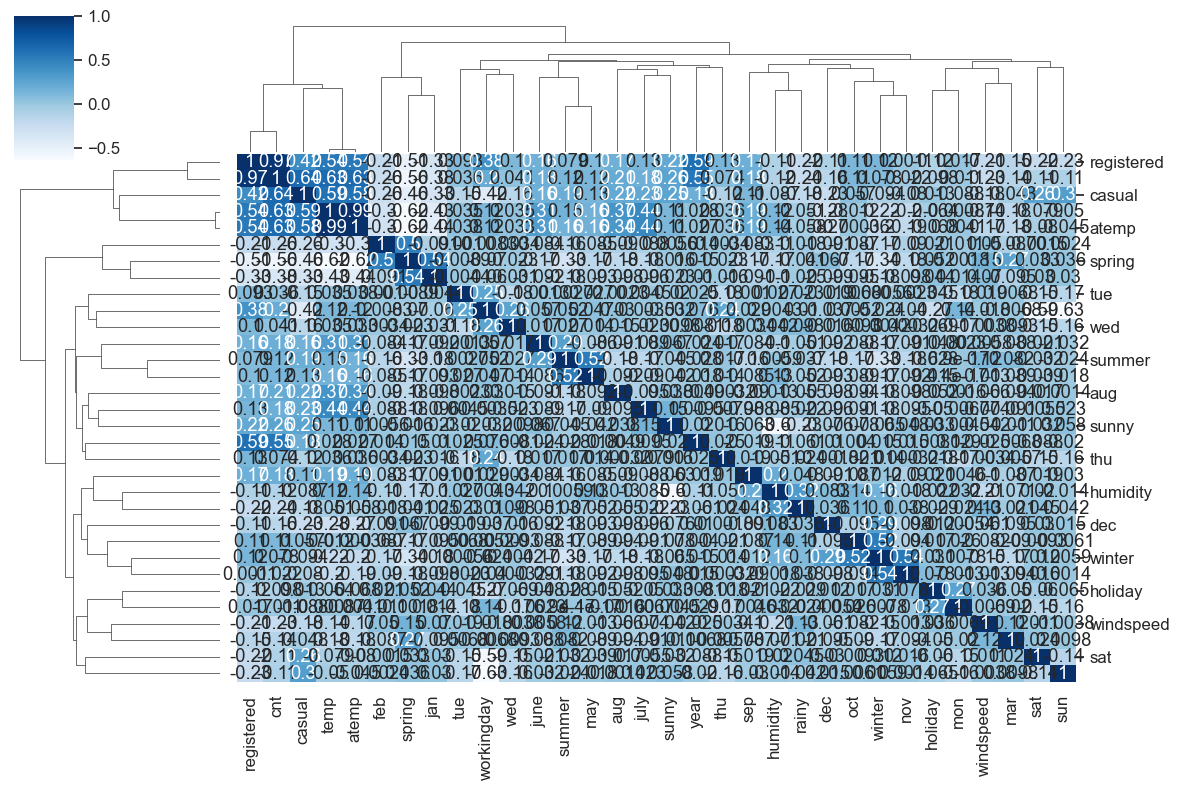

In [101]:
numerical_columns = df_new.select_dtypes(include=[int, float]).columns
corr = df_new[numerical_columns].corr()
sea.set(font_scale=1.1)
sea.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plot.show()

In [102]:
cnt_corr = corr['cnt']
cnt_corr.sort_values(ascending=False)

cnt           1.000000
registered    0.965745
casual        0.639149
atemp         0.627735
temp          0.625479
year          0.553807
sunny         0.256000
aug           0.206522
workingday    0.197267
june          0.183556
sep           0.178078
july          0.176518
may           0.121999
summer        0.120679
oct           0.112864
winter        0.078447
thu           0.073632
wed           0.040681
tue           0.036196
mon          -0.011215
nov          -0.022020
holiday      -0.098185
sun          -0.105044
sat          -0.114413
humidity     -0.118792
mar          -0.140302
dec          -0.160513
windspeed    -0.231520
rainy        -0.236323
feb          -0.256726
jan          -0.376404
spring       -0.561637
Name: cnt, dtype: float64

In [103]:
# Print results
correlations = analyze_correlations(df_new, numerical_columns, thresh_config)
table_data = []

for category, var_pairs in correlations.items():
    for var1, var2, corr_coef in var_pairs:
        table_data.append({
            "Category": category,
            "Feature A": var1,
            "Feature B": var2,
            "Correlation Coefficient": corr_coef
        })

df_corr = pd.DataFrame(table_data)
df_corr
#df_corr[df_corr['Feature B']=='cnt']

Category   Feature A   Feature B  Correlation Coefficient
0    Strong Positive        temp       atemp             9.914911e-01
1    Strong Positive  registered         cnt             9.657455e-01
2      Weak Positive        year     holiday             8.101834e-03
3      Weak Positive        year  workingday             7.604499e-02
4      Weak Positive        year        temp             2.799553e-02
5      Weak Positive        year       atemp             2.668149e-02
6      Weak Positive        year      casual             1.788884e-01
7      Weak Positive        year      spring             1.473122e-02
8      Weak Positive        year      winter             1.473122e-02
9      Weak Positive        year         aug             4.864556e-03
10     Weak Positive        year         dec             1.025470e-02
11     Weak Positive        year         feb             1.414124e-02
12     Weak Positive        year         jan             1.025470e-02
13     Weak Positive        year        july             9.530847e-03
14     Weak Positive        year         nov             1.528861e-02
15     Weak Positive        year         oct             3.967399e-03
16     Weak Positive        year         mon             2.876305e-02
17     Weak Positive        year         thu             2.469033e-02
18     Weak Positive        year         tue             2.489547e-02
19     Weak Positive        year         wed             8.057623e-03
20     Weak Positive        year       sunny             2.031840e-02
21     Weak Positive     holiday   windspeed             3.626320e-02
22     Weak Positive     holiday      casual             1.266942e-02
23     Weak Positive     holiday      spring             5.225467e-02
24     Weak Positive     holiday      winter             3.107035e-02
25     Weak Positive     holiday         dec             1.197381e-02
26     Weak Positive     holiday         feb             2.115123e-02
27     Weak Positive     holiday         jan             4.404653e-02
28     Weak Positive     holiday         nov             7.755019e-02
29     Weak Positive     holiday         oct             1.689148e-02
30     Weak Positive     holiday         sep             2.115123e-02
31     Weak Positive     holiday         mon             2.674800e-01
32     Weak Positive     holiday       sunny             3.318015e-02
33     Weak Positive  workingday        temp             1.177792e-01
34     Weak Positive  workingday       atemp             1.162550e-01
35     Weak Positive  workingday    humidity             4.257063e-03
36     Weak Positive  workingday  registered             3.760477e-01
37     Weak Positive  workingday         cnt             1.972666e-01
38     Weak Positive  workingday      summer             5.155191e-02
39     Weak Positive  workingday         aug             2.951699e-02
40     Weak Positive  workingday        june             5.675929e-02
41     Weak Positive  workingday         may             4.742222e-02
42     Weak Positive  workingday         oct             5.182541e-03
43     Weak Positive  workingday         sep             2.895983e-02
44     Weak Positive  workingday         mon             1.358588e-01
45     Weak Positive  workingday         thu             2.401150e-01
46     Weak Positive  workingday         tue             2.524904e-01
47     Weak Positive  workingday         wed             2.587062e-01
48     Weak Positive  workingday       rainy             9.994764e-03
49     Weak Positive        temp    humidity             1.240269e-01
50     Weak Positive        temp      summer             1.495096e-01
51     Weak Positive        temp         aug             3.681892e-01
52     Weak Positive        temp        june             3.126091e-01
53     Weak Positive        temp         may             1.554055e-01
54     Weak Positive        temp         sep             1.930108e-01
55     Weak Positive        temp         thu             3.576833e-02
56     Weak Positive  

# Split data into training and testing sets:


In [104]:
train_set,test_set=train_test_split(df_new,test_size=0.20,random_state=42)

In [105]:
train_set.count()


year          540
holiday       540
workingday    540
temp          540
atemp         540
humidity      540
windspeed     540
casual        540
registered    540
cnt           540
spring        540
summer        540
winter        540
aug           540
dec           540
feb           540
jan           540
july          540
june          540
mar           540
may           540
nov           540
oct           540
sep           540
mon           540
sat           540
sun           540
thu           540
tue           540
wed           540
rainy         540
sunny         540
dtype: int64

In [106]:
test_set.count()

year          135
holiday       135
workingday    135
temp          135
atemp         135
humidity      135
windspeed     135
casual        135
registered    135
cnt           135
spring        135
summer        135
winter        135
aug           135
dec           135
feb           135
jan           135
july          135
june          135
mar           135
may           135
nov           135
oct           135
sep           135
mon           135
sat           135
sun           135
thu           135
tue           135
wed           135
rainy         135
sunny         135
dtype: int64

In [107]:
import statsmodels.api as sm

def evaluate_model(X_train,y_train,X_test,y_test,models):
    print('Started evaluating Models')
    try:
        report = {}
        for i in range(len(models)):
            model = list(models.values())[i]
            # Train model
            
            if isinstance(model, str):
                # Statsmodels OLS
                X_train_sm = sm.add_constant(X_train)
                model= sm.OLS(y_train, X_train_sm).fit()
                print(model.summary())
            else:
                # Scikit-learn LinearRegression or other compatible models
                model.fit(X_train, y_train)
            # Predict Testing data
            y_test_pred =model.predict(X_test)

            # Get R2 scores for train and test data
            #train_model_score = r2_score(ytrain,y_train_pred)
            test_model_score = r2_score(y_test,y_test_pred)

            report[list(models.keys())[i]] =  test_model_score

        return report

    except Exception as e:
        print(f'Exception occurred during evaluate_model: {str(e)}')
        

In [123]:

    def initate_model_training(train_array,test_array):
        try:
            print('Splitting Dependent and Independent variables from train and test data')
            X_train, y_train, X_test, y_test = (
                train_array.loc[:, train_array.columns != 'cnt'],
                train_array['cnt'], 
                test_array.loc[:, test_array.columns != 'cnt'],
                test_array['cnt']
            )
            print('Training and Test data created as Indepent and dependent dataset')
            models={
            'Statsmodels OLS': 'OLS'
            }
            
            model_report:dict=evaluate_model(X_train,y_train,X_test,y_test,models)
        except Exception as e:
            print('Exception occured at Model Training')
            print('Error Message: ', str(e))

In [120]:
train_set.head()

year  holiday  workingday       temp     atemp  humidity  windspeed  \
256     0        0           1  27.606653  31.34500   69.7083  11.209100   
226     0        0           1  27.299153  30.80835   71.2083  13.999918   
18      0        0           1  11.979134  14.92110   74.1739  13.957239   
587     1        0           0  28.392500  31.91335   73.2917  13.834093   
528     1        0           1  26.889153  30.55585   58.2083  22.999693   

     casual  registered   cnt  spring  summer  winter  aug  dec  feb  jan  \
256     647        4138  4785       0       0       0    0    0    0    0   
226     775        3563  4338       0       0       0    1    0    0    0   
18       78        1572  1650       1       0       0    0    0    0    1   
587    2247        4052  6299       0       0       0    1    0    0    0   
528    1173        6248  7421       0       1       0    0    0    0    0   

     july  june  mar  may  nov  oct  sep  mon  sat  sun  thu  tue  wed  rainy  \
256     0     0    0    0    0    0    1    0    0    0    0    0    1      0   
226     0     0    0    0    0    0    0    1    0    0    0    0    0      0   
18      0     0    0    0    0    0    0    0    0    0    0    0    1      0   
587     0     0    0    0    0    0    0    0    1    0    0    0    0      0   
528     0     1    0    0    0    0    0    0    0    0    0    0    1      0   

     sunny  
256      1  
226      1  
18       0  
587      0  
528      1

In [121]:
test_set.head()

year  holiday  workingday       temp     atemp  humidity  windspeed  \
409     1        0           1  13.085847  16.69730   50.8750   9.458993   
313     0        0           1  15.580000  18.68605   81.3333  12.667489   
728     1        0           0  10.489153  11.58500   48.3333  23.500518   
583     1        0           1  30.169153  34.88105   70.3750   7.832836   
389     1        0           1  12.060847  14.74105   64.3750  10.791757   

     casual  registered   cnt  spring  summer  winter  aug  dec  feb  jan  \
409     135        3787  3922       1       0       0    0    0    1    0   
313     190        2743  2933       0       0       1    0    0    0    0   
728     364        1432  1796       1       0       0    0    1    0    0   
583    1278        5995  7273       0       0       0    1    0    0    0   
389     467        3803  4270       1       0       0    0    0    0    1   

     july  june  mar  may  nov  oct  sep  mon  sat  sun  thu  tue  wed  rainy  \
409     0     0    0    0    0    0    0    0    0    0    0    1    0      0   
313     0     0    0    0    1    0    0    0    0    0    1    0    0      0   
728     0     0    0    0    0    0    0    0    0    1    0    0    0      0   
583     0     0    0    0    0    0    0    0    0    0    0    1    0      0   
389     0     0    0    0    0    0    0    0    0    0    0    0    1      0   

     sunny  
409      0  
313      0  
728      1  
583      0  
389      1

In [124]:
initate_model_training(train_set,test_set)

Splitting Dependent and Independent variables from train and test data
Training and Test data created as Indepent and dependent dataset
Started evaluating Models
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.325e+30
Date:                Sun, 26 May 2024   Prob (F-statistic):               0.00
Time:                        10:03:54   Log-Likelihood:                 13275.
No. Observations:                 540   AIC:                        -2.649e+04
Df Residuals:                     509   BIC:                        -2.635e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t     

## Build OLS model

In [180]:
model_ols = sm.OLS(y_train, X_train).fit()

# Evaluate OLS model
print(model_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.027e+31
Date:                Sat, 25 May 2024   Prob (F-statistic):                        0.00
Time:                        07:52:18   Log-Likelihood:                          14401.
No. Observations:                 584   AIC:                                 -2.874e+04
Df Residuals:                     554   BIC:                                 -2.861e+04
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

### Regression Metrics

* **MSE (Mean Squared Error)**: measures the average squared difference between predicted and actual values.
* **MAE (Mean Absolute Error)**: measures the average absolute difference between predicted and actual values.
* **RMSE (Root Mean Squared Error)**: the square root of MSE.
* **R (R-Squared)**: measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

### Model Evaluation Technique

* **Cross-Validation**: evaluates the model's performance on unseen data by splitting the dataset into training and testing sets.